# Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn import metrics
import seaborn as sns
%matplotlib inline



In [2]:
df= pd.read_csv('housing data.csv',header=None)
df.head()

0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Observem que tenim 14 columnes, 506 dades, cap de nul i que totes les variables són numèriques.

Mirem la informació del dataset per poder entendre les variables:

In [4]:
with open('housing data description.txt', encoding='utf8') as f:
    for line in f:
        print(line.strip())

1. Title: Boston Housing Data

2. Sources:
(a) Origin:  This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University.
(b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.
(c) Date: July 7, 1993

3. Past Usage:
-   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley,
1980.   N.B. Various transformations are used in the table on
pages 244-261.
-  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
In Proceedings on the Tenth International Conference of Machine
Learning, 236-243, University of Massachusetts, Amherst. Morgan
Kaufmann.

4. Relevant Information:

Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

1. CRIM      per capita crime rate by town
2. ZN 

·Observem que 'CHAS'és una variable categórica.

· Posem nom a cada columna:

In [5]:
df.columns=['CRIM','ZN','INDUS',' CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns

Index(['CRIM', 'ZN', 'INDUS', ' CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
df.head()

CRIM    ZN  INDUS   CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31      0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07      0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07      0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18      0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18      0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [7]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
 CHAS        2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Observem que la variable 'CHAS' és binària.

In [8]:
df.describe().transpose()

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
 CHAS    506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677082   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
 CHAS      0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

Observem que les mitjanes i la desviació estàndard de cada variable tenen valors molt diferents i molt allunyats entre si.
Ho haurem de tenir en compte si volem comparar variables

Observem també la relació entre variables amb una matriu de correlació:

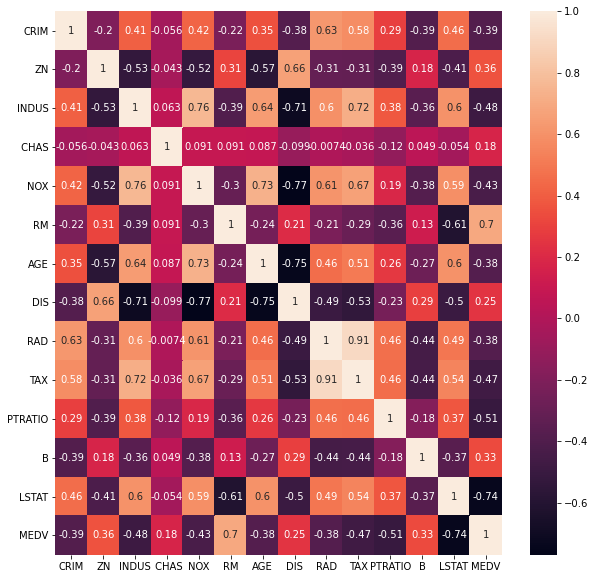

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cbar=True, annot=True);





Veiem algunes correlacions clares, lineals o polinòmiques, entre aquestes variables:
        · MEDV amb RM i LSTAT\
        · LSTAT amb NOX, RM, AGE, DIS, MEDV\
        · DIS amb NOX, AGE, LSTAT, MEDV\
        · AGE amb NOX, DIS, LSTAT, MEDV\
        · RM amb LSTAT I MEDV\
        · NOX amb RM, AGE, DIS, LSTAT, MEDV\
       ·  CRIM amb AGE, DIS, LSTST, MEDV\




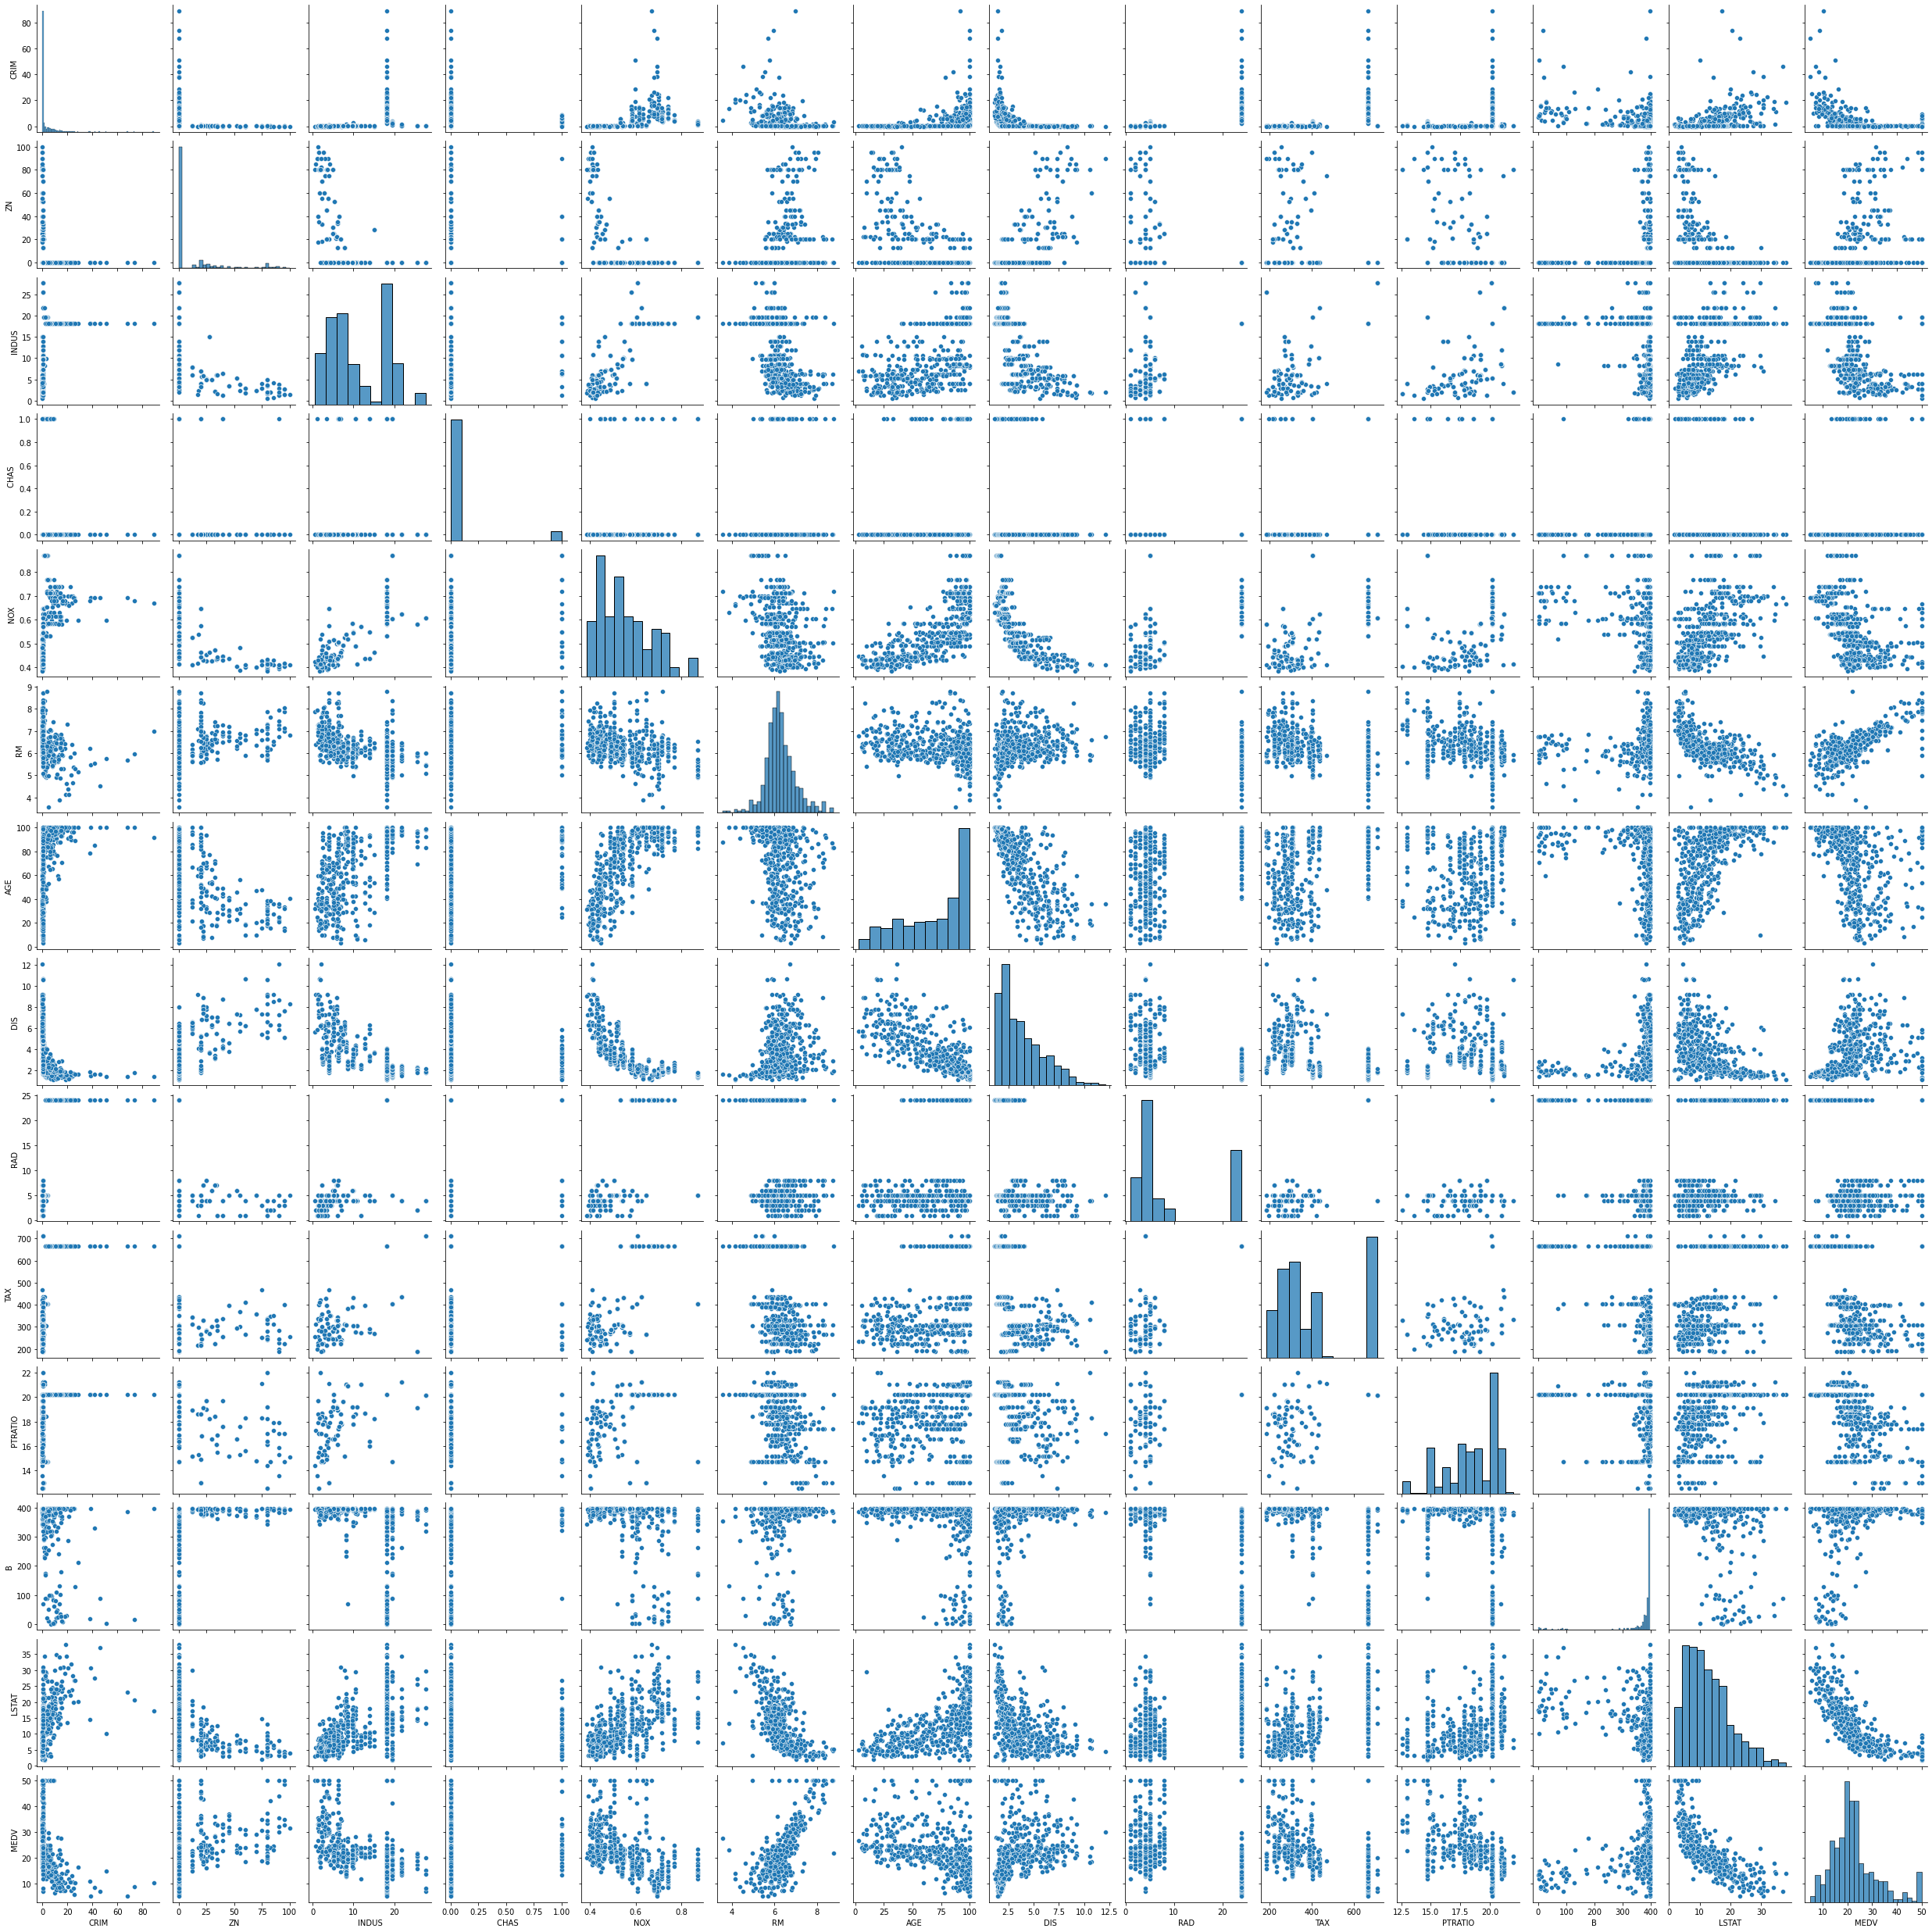

In [10]:
sns.pairplot(df)

Observem que l'única variable que sembla tenir una distribució normal o gaussiana és 'RM', ho comprovem:

In [11]:


from scipy import stats

shapiro_test = stats.shapiro(df['RM'])
shapiro_test

#print('Hipotesis nula Ho : La mostra té una distribució normal')
#print('Hipotesis alternativa H1 : La mostra no té una distribució normal\n\n')

if shapiro_test.pvalue>0.05:
    print('No podem rebutjar hipotesis nula')
    print('La mostra té una distribució normal')
else:
    print("Podem rebutjar l'hipotesis nula")
    print('La mostra no té una distribució normal')


Podem rebutjar l'hipotesis nula
La mostra no té una distribució normal


Definim la nostra variable objectiu/target.

A partir d´aquest dataset volem construir un model que ens permeti predir el valor mitjà de les cases ocupades pels seus propietaris (MEDV) en funció de les característiques de la zona, aquesta serà per tant, la nostra variable resposta.


In [12]:

X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']



·Amb la nostra variable objectiu ja definida, dividim el conjunt de dades en train i test, un 80% de les dades seran train i un 20% test:

In [13]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [14]:
X_train.describe().transpose()


count        mean         std        min         25%        50%  \
CRIM     404.0    3.714276    8.497258    0.00632    0.079980    0.26266   
ZN       404.0   10.996287   22.941789    0.00000    0.000000    0.00000   
INDUS    404.0   11.085347    6.870004    0.74000    5.130000    9.69000   
 CHAS    404.0    0.061881    0.241238    0.00000    0.000000    0.00000   
NOX      404.0    0.557086    0.117656    0.38500    0.449000    0.53800   
RM       404.0    6.272166    0.712302    3.56100    5.886500    6.20850   
AGE      404.0   68.894307   28.096077    2.90000   45.675000   77.50000   
DIS      404.0    3.787746    2.135045    1.12960    2.087875    3.14230   
RAD      404.0    9.784653    8.818302    1.00000    4.000000    5.00000   
TAX      404.0  413.091584  170.053776  187.00000  281.000000  334.50000   
PTRATIO  404.0   18.473515    2.171029   12.60000   17.375000   19.10000   
B        404.0  357.850767   89.476355    0.32000  375.085000  391.26000   
LSTAT    404.0   12.788218    7.225008    1.73000    7.170000   11.39500   

                75%       max  
CRIM       3.896877   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
 CHAS      0.000000    1.0000  
NOX        0.647000    0.8710  
RM         6.607000    8.7800  
AGE       93.925000  100.0000  
DIS        5.141475   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.157500  396.9000  
LSTAT     17.105000   37.9700

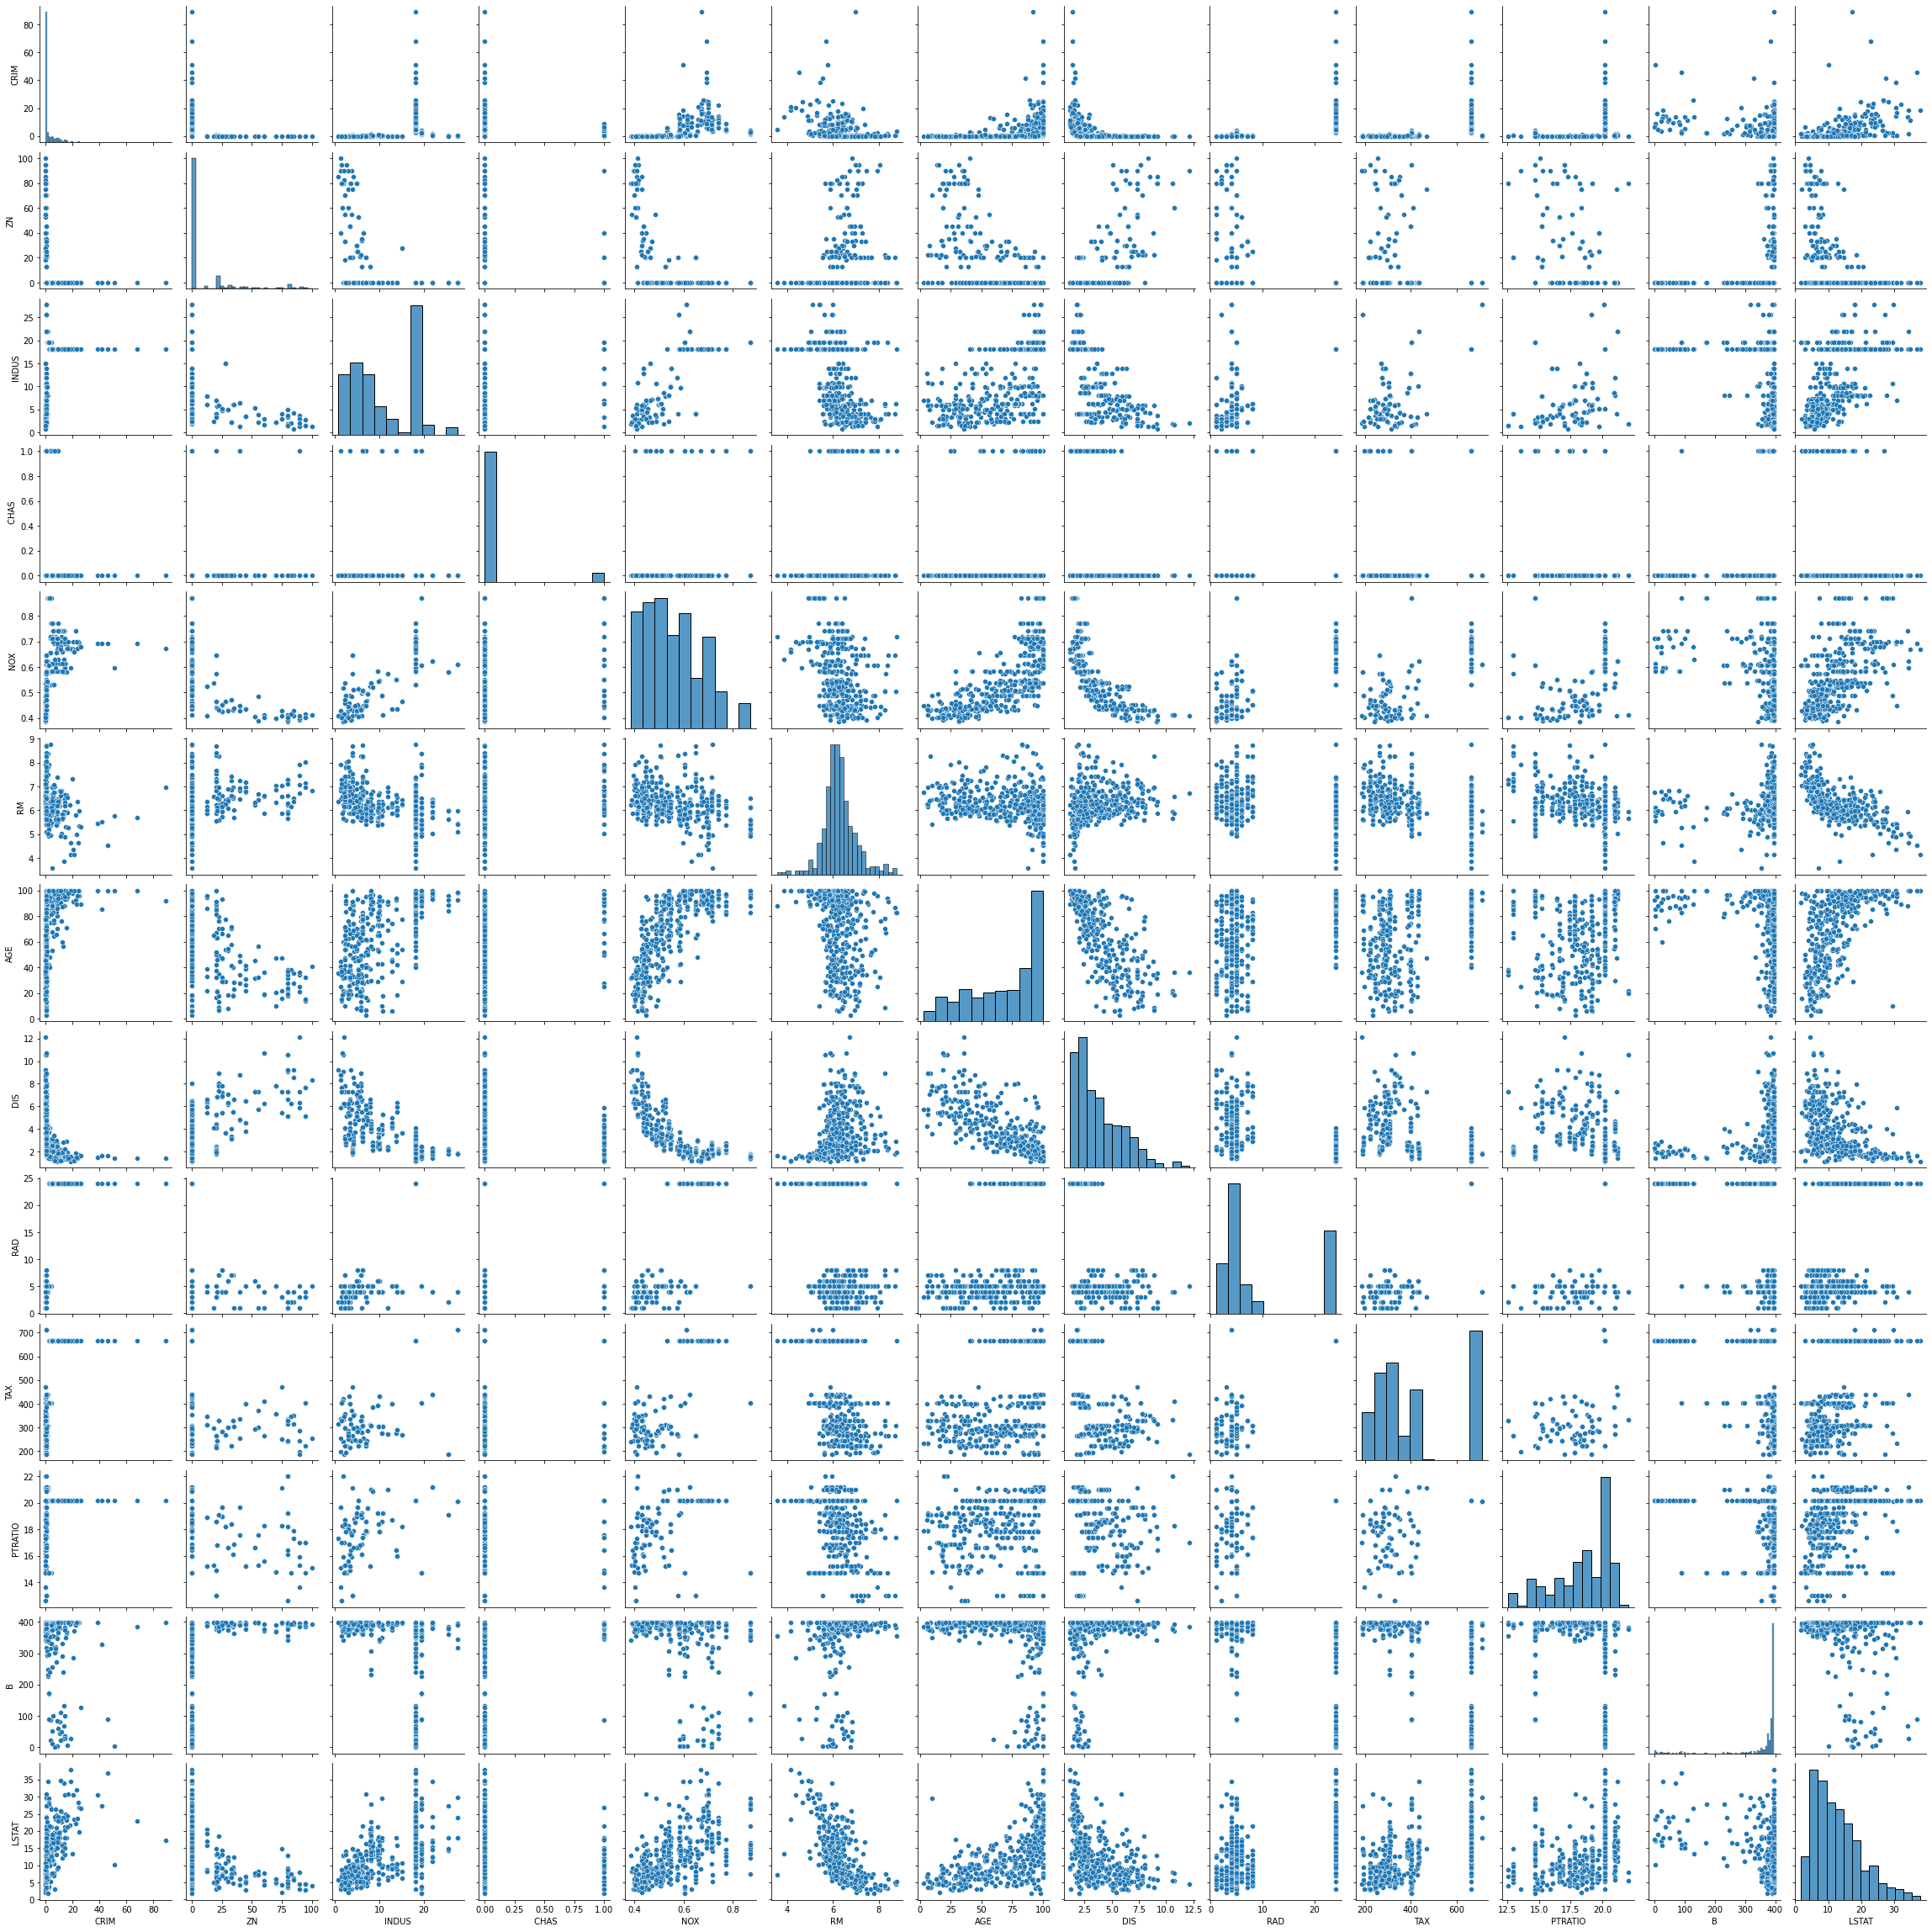

In [15]:
sns.pairplot(X_train);

In [16]:
X_test.describe().transpose()

count        mean         std        min         25%        50%  \
CRIM     102.0    3.214466    9.035087    0.01301    0.090897    0.23536   
ZN       102.0   12.818627   24.837770    0.00000    0.000000    0.00000   
INDUS    102.0   11.340490    6.851950    0.46000    6.200000    9.90000   
 CHAS    102.0    0.098039    0.298836    0.00000    0.000000    0.00000   
NOX      102.0    0.545226    0.108582    0.39200    0.449250    0.52400   
RM       102.0    6.334020    0.663926    4.90300    5.881250    6.22600   
AGE      102.0   67.309804   28.460939    6.60000   42.350000   77.25000   
DIS      102.0    3.823943    1.995116    1.33250    2.203050    3.39480   
RAD      102.0    8.617647    8.228235    1.00000    4.000000    5.00000   
TAX      102.0  389.009804  161.769454  188.00000  277.000000  307.00000   
PTRATIO  102.0   18.384314    2.149821   13.00000   17.400000   18.60000   
B        102.0  352.013235   98.496089    6.68000  375.667500  392.76000   
LSTAT    102.0   12.117745    6.806263    2.47000    6.345000   11.28500   

                75%       max  
CRIM       1.965348   73.5341  
ZN        16.250000   95.0000  
INDUS     18.100000   27.7400  
 CHAS      0.000000    1.0000  
NOX        0.605000    0.8710  
RM         6.716000    8.3370  
AGE       94.400000  100.0000  
DIS        5.202825    9.2229  
RAD        8.000000   24.0000  
TAX      437.000000  711.0000  
PTRATIO   20.200000   21.2000  
B        396.237500  396.9000  
LSTAT     16.007500   29.9700

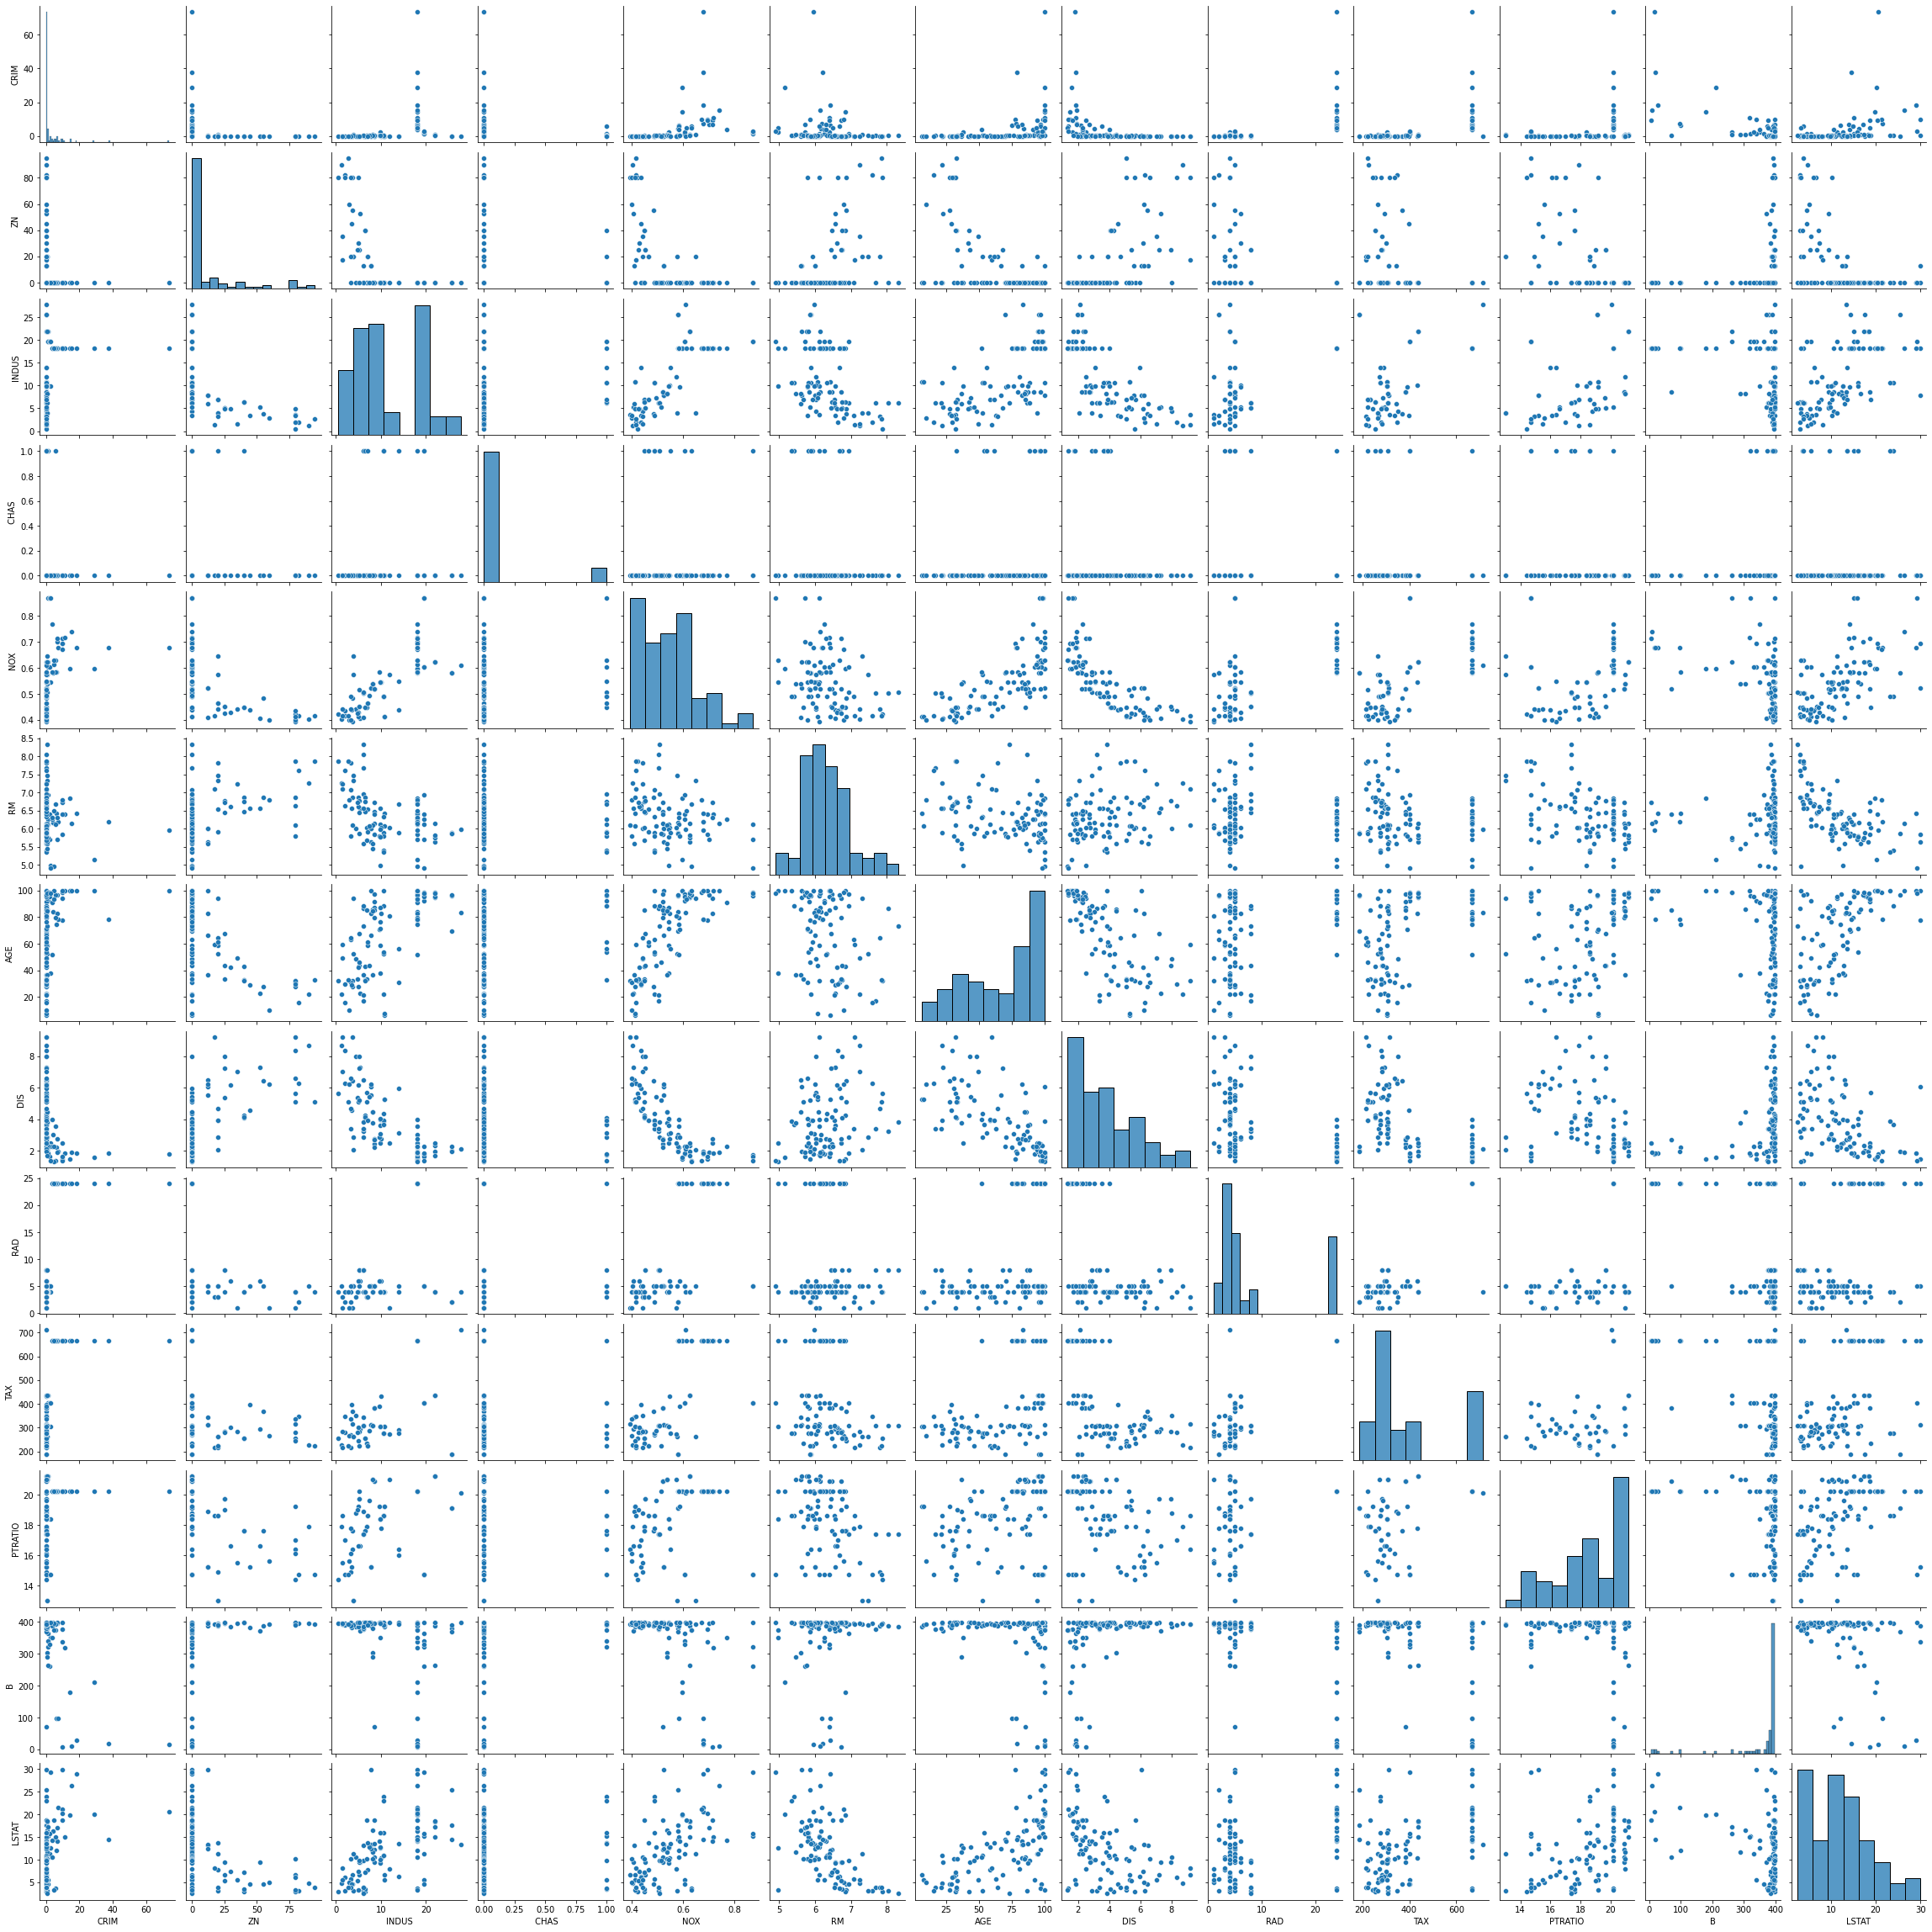

In [17]:
sns.pairplot(X_test);

# Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Ara que tenim les dades amb què treballarem, el primer pas serà realitzar una exploració del conjunt de dades. Aquesta revisió ens servirà per evitar errors en l'anàlisi de les dades i el procés de modelatge.


En el cas de les dades numèriques que tenim varies opcions:

    Dades Normals: ESTANDARITZACIÓ
    No Normals:
        Sense Outliers: NORMALITZACIO minmax, onehote..etc.
        Amb outliers: NORMALITZACIÓ TENINT EN COMPTE OUTLIERS, com Robust Scaled.



    
   

Comprovem les nostres variables: 

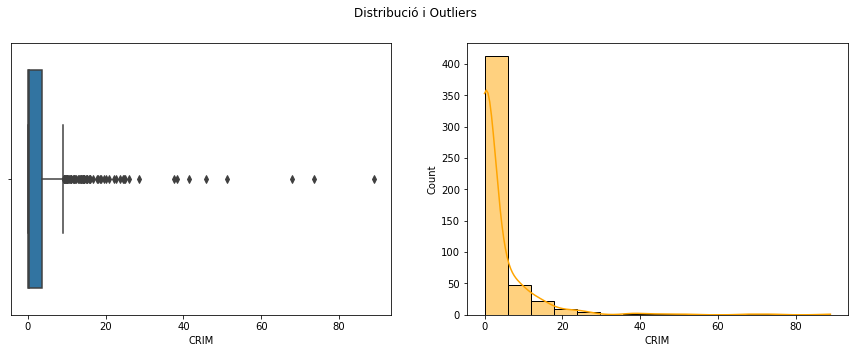

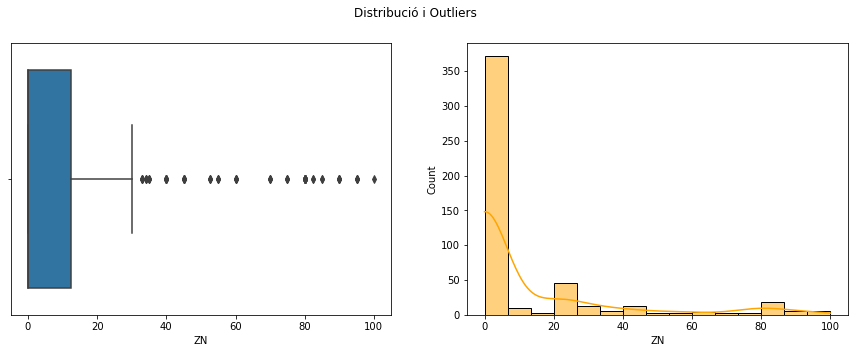

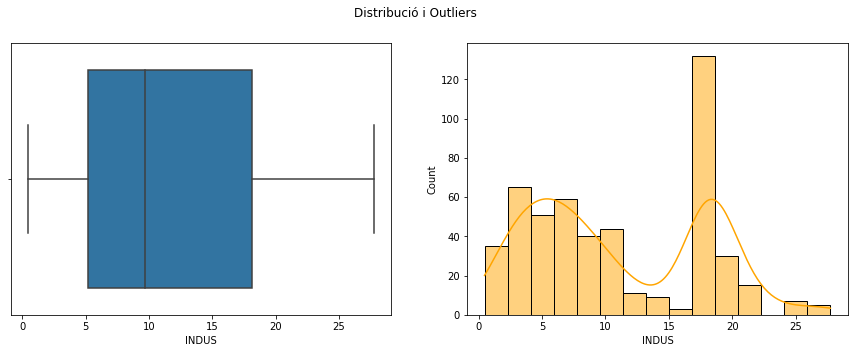

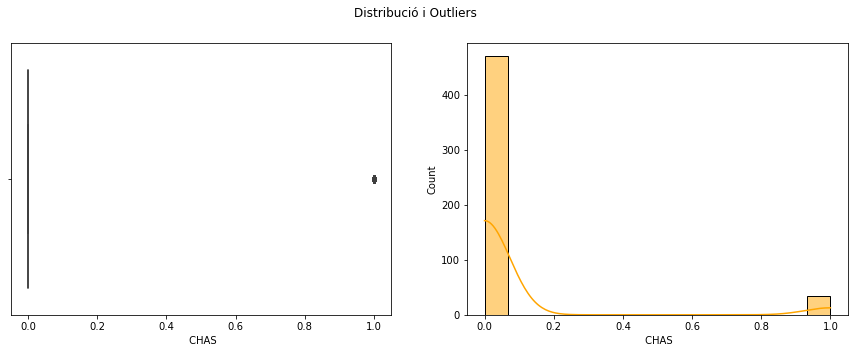

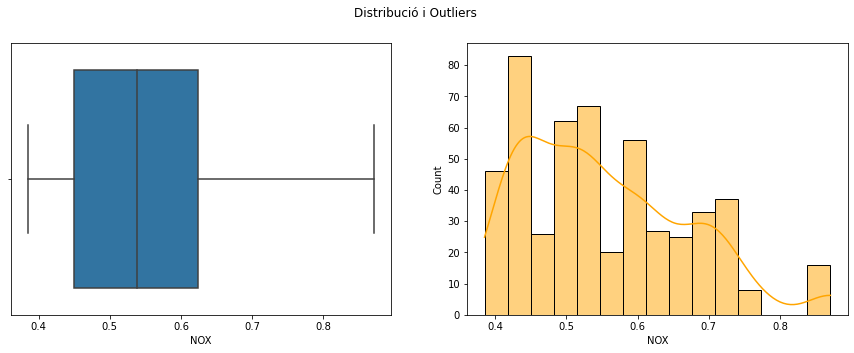

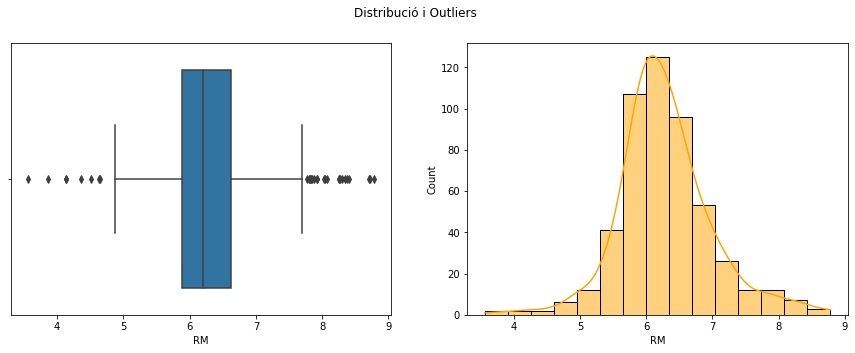

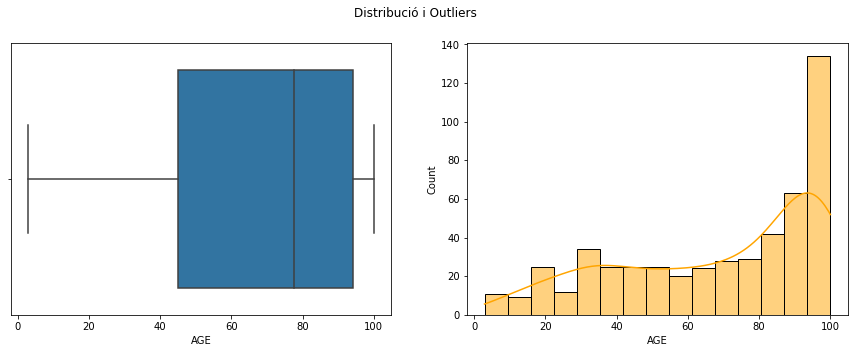

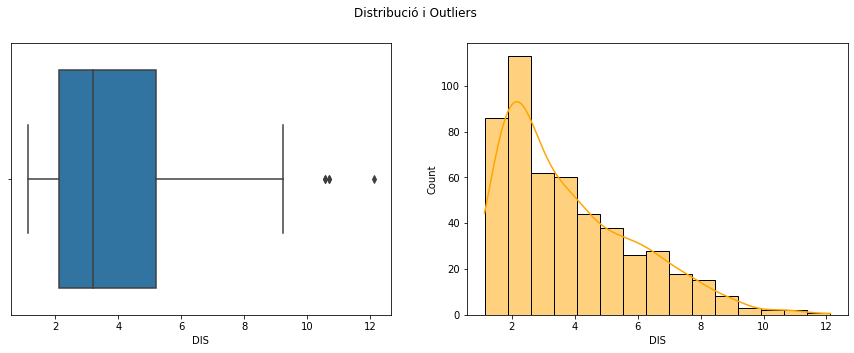

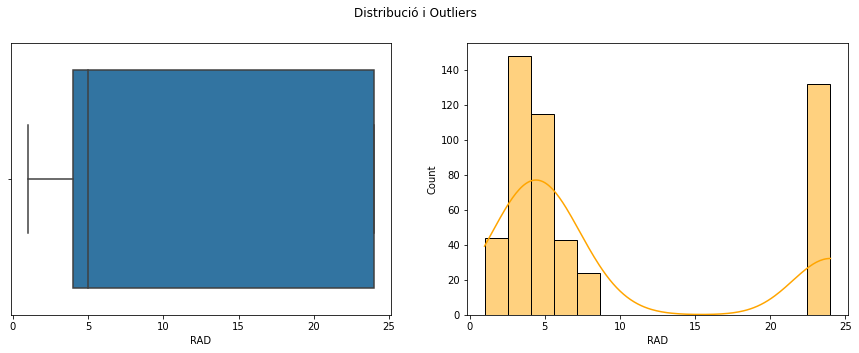

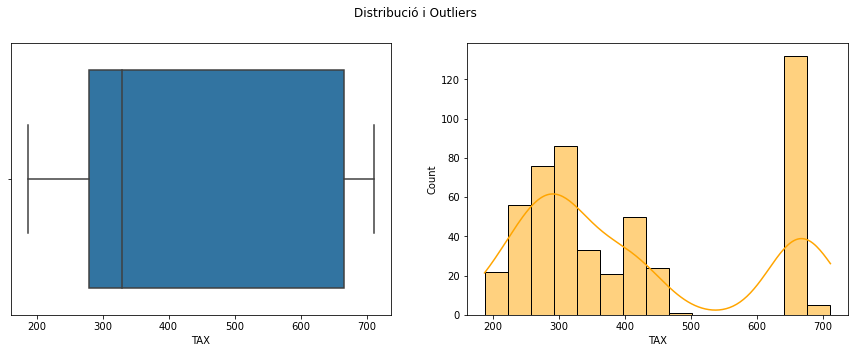

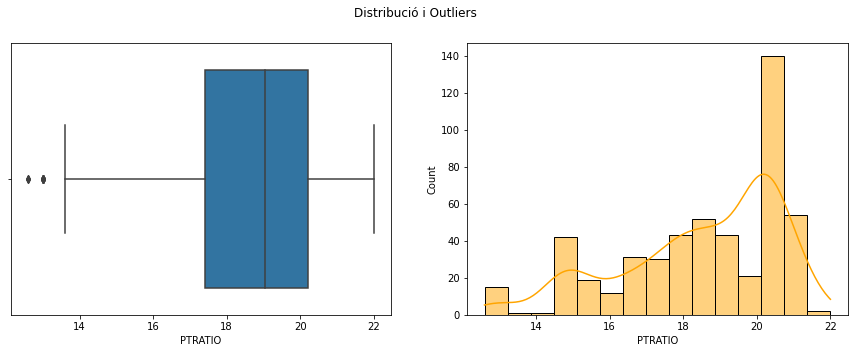

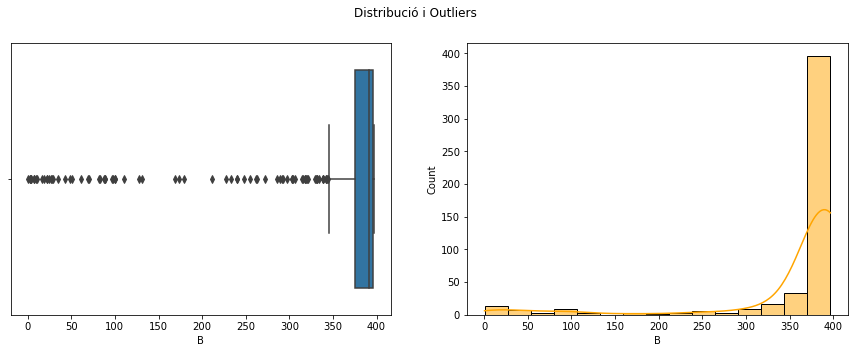

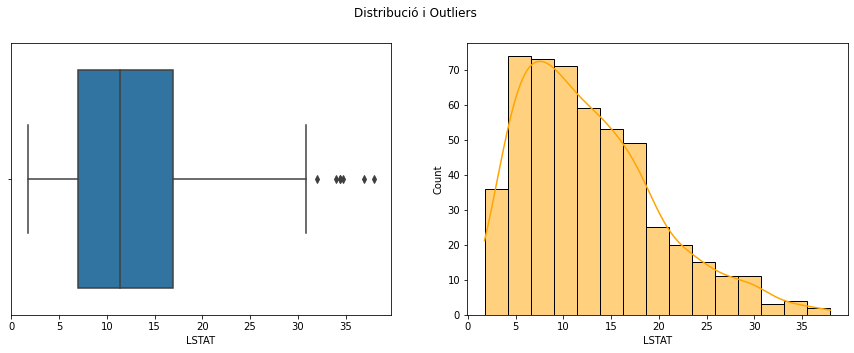

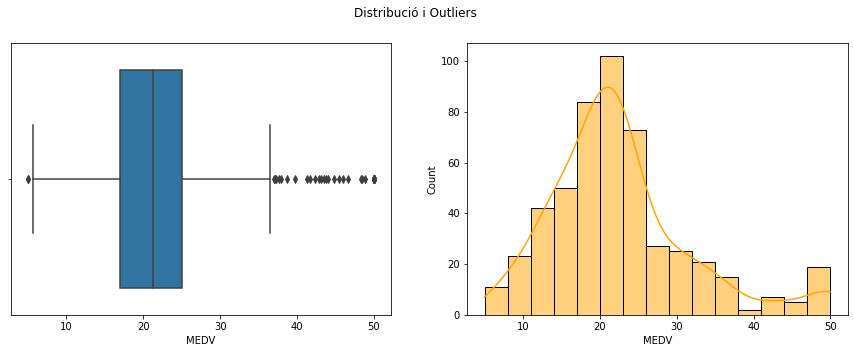

In [18]:

def plotsPreProcessing(df):
    for column in df:
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('Distribució i Outliers')
        sns.histplot(ax=axes[1], data=df, x=df[column], bins=15, color='orange', kde= True)
        sns.boxplot(ax=axes[0], x =df[column])
    
    
plotsPreProcessing(df)

Veiem que cap tè distribuciò normal, que 'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO','B' i 'LSTAT' tenen outliers i 'CHAS' es dummy. 


Fem la estandartzació en X_test i ho comprovem gràficament:


In [19]:
from sklearn import preprocessing
#MinMaxScaler per la normalizació
normColumns = ['INDUS','NOX','AGE', 'TAX','RAD']
scalerNorm = preprocessing.MinMaxScaler().fit(X_train[normColumns])
X_test[normColumns] = scalerNorm.transform(X_test[normColumns])

#RobustScaler per les variables amb outliers
robColumns = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO','B', 'LSTAT']
robustScaler = preprocessing.RobustScaler().fit(X_train[robColumns])
X_test[robColumns] = robustScaler.transform(X_test[robColumns])


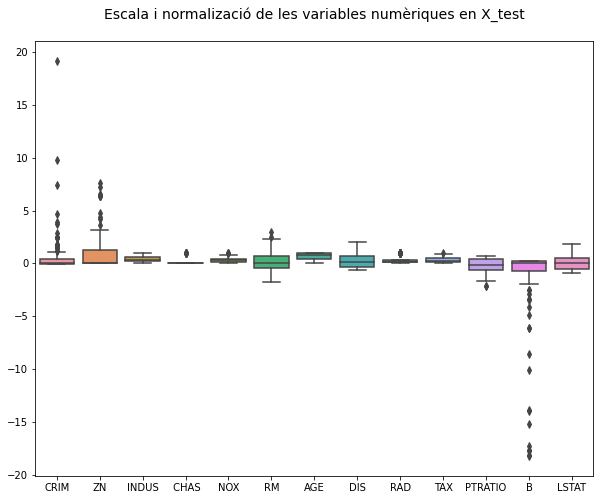

In [20]:


#plot it
plt.figure(figsize=(10, 8))
sns.boxplot(data=X_test)
plt.title('Escala i normalizació de les variables numèriques en X_test\n', size = 14)
plt.show()



Fem la estandartzació en X_train i ho comprovem gràficament:


In [21]:

#MinMaxScaler per la normalizació

X_train[normColumns] = scalerNorm.transform(X_train[normColumns])

#RobustScaler per les variables amb outliers

X_train[robColumns] = robustScaler.transform(X_train[robColumns])


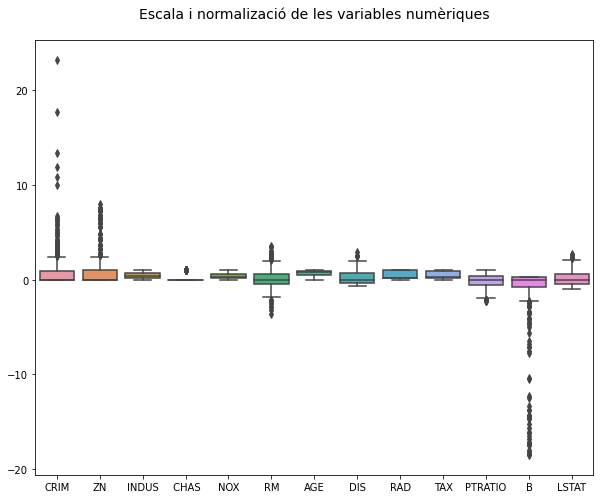

In [22]:
#plot it
plt.figure(figsize=(10, 8))
sns.boxplot(data=X_train)
plt.title('Escala i normalizació de les variables numèriques\n', size = 14)
plt.show()


# Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

In [23]:
X_train.describe().transpose()

count      mean       std        min       25%           50%  \
CRIM     404.0  0.904299  2.226221  -0.067159 -0.047861  7.264155e-18   
ZN       404.0  0.879703  1.835343   0.000000  0.000000  0.000000e+00   
INDUS    404.0  0.383161  0.254445   0.000000  0.162593  3.314815e-01   
 CHAS    404.0  0.061881  0.241238   0.000000  0.000000  0.000000e+00   
NOX      404.0  0.354086  0.242091   0.000000  0.131687  3.148148e-01   
RM       404.0  0.088363  0.988622  -3.674532 -0.446912  0.000000e+00   
AGE      404.0  0.679653  0.289352   0.000000  0.440525  7.682801e-01   
DIS      404.0  0.211372  0.699189  -0.659124 -0.345306  7.264155e-17   
RAD      404.0  0.381941  0.383404   0.000000  0.130435  1.739130e-01   
TAX      404.0  0.431472  0.324530   0.000000  0.179389  2.814885e-01   
PTRATIO  404.0 -0.221765  0.768506  -2.300885 -0.610619  0.000000e+00   
B        404.0 -1.585442  4.246120 -18.552141 -0.767588  0.000000e+00   
LSTAT    404.0  0.140233  0.727228  -0.972823 -0.425264  8.944668e-17   

              75%        max  
CRIM     0.952139  23.242317  
ZN       1.000000   8.000000  
INDUS    0.642963   1.000000  
 CHAS    0.000000   1.000000  
NOX      0.539095   1.000000  
RM       0.553088   3.569049  
AGE      0.937436   1.000000  
DIS      0.654694   2.942167  
RAD      1.000000   1.000000  
TAX      0.914122   1.000000  
PTRATIO  0.389381   1.026549  
B        0.232412   0.267647  
LSTAT    0.574736   2.674887

In [24]:
X_test.describe().transpose()

count      mean       std        min       25%       50%       75%  \
CRIM     102.0  0.773352  2.367129  -0.065407 -0.045001 -0.007152  0.446092   
ZN       102.0  1.025490  1.987022   0.000000  0.000000  0.000000  1.300000   
INDUS    102.0  0.392611  0.253776  -0.010370  0.202222  0.339259  0.642963   
 CHAS    102.0  0.098039  0.298836   0.000000  0.000000  0.000000  0.000000   
NOX      102.0  0.329684  0.223420   0.014403  0.132202  0.286008  0.452675   
RM       102.0  0.174212  0.921479  -1.811936 -0.454198  0.024289  0.704372   
AGE      102.0  0.663335  0.293110   0.038105  0.406282  0.765705  0.942327   
DIS      102.0  0.223226  0.653365  -0.592677 -0.307588  0.082689  0.674785   
RAD      102.0  0.331202  0.357749   0.000000  0.130435  0.173913  0.304348   
TAX      102.0  0.385515  0.308720   0.001908  0.171756  0.229008  0.477099   
PTRATIO  102.0 -0.253340  0.760999  -2.159292 -0.601770 -0.176991  0.389381   
B        102.0 -1.862464  4.674153 -18.250326 -0.739945  0.071183  0.236208   
LSTAT    102.0  0.072747  0.685079  -0.898339 -0.508304 -0.011072  0.464268   

               max  
CRIM     19.196596  
ZN        7.600000  
INDUS     1.000000  
 CHAS     1.000000  
NOX       1.000000  
RM        2.954198  
AGE       1.000000  
DIS       1.991289  
RAD       1.000000  
TAX       1.000000  
PTRATIO   0.743363  
B         0.267647  
LSTAT     1.869653

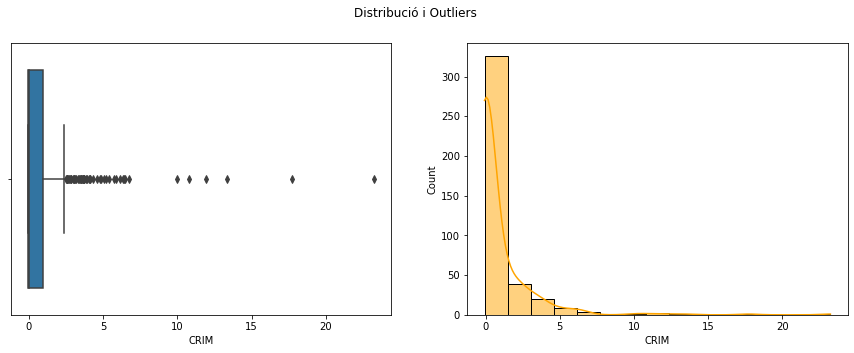

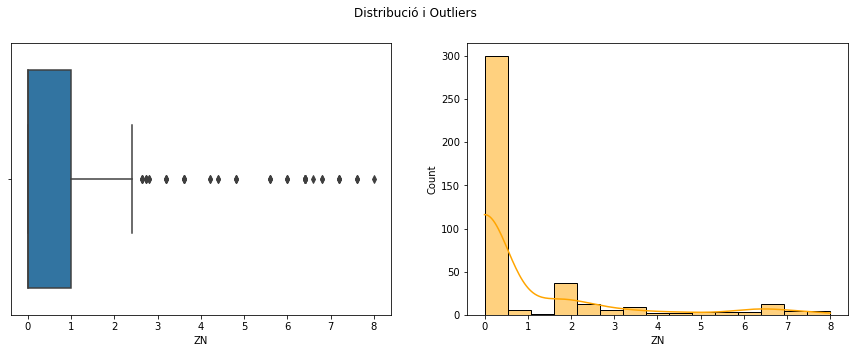

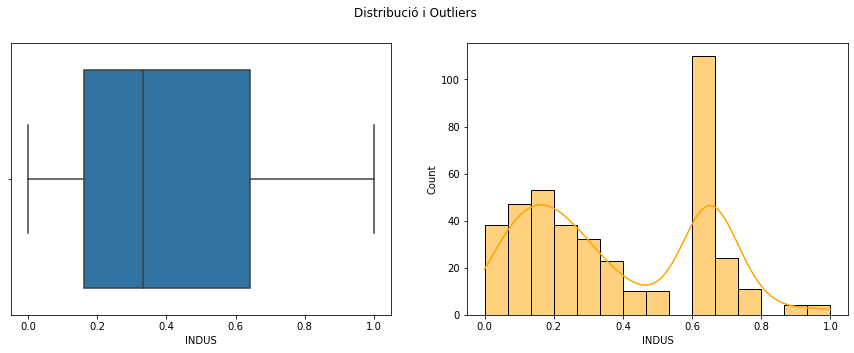

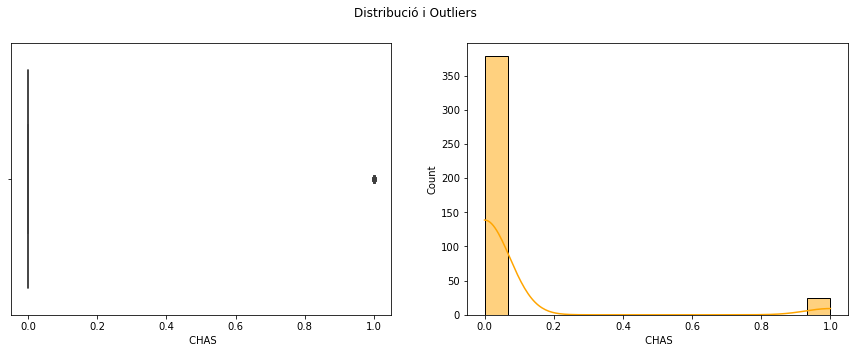

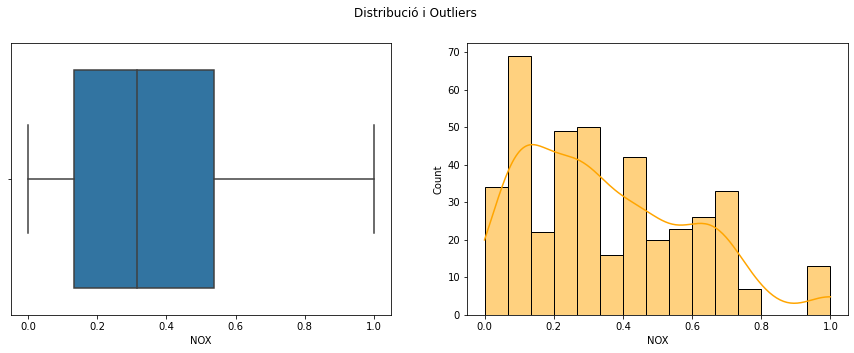

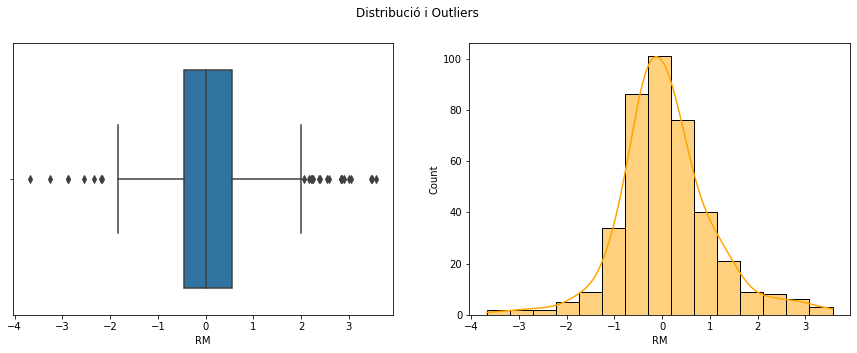

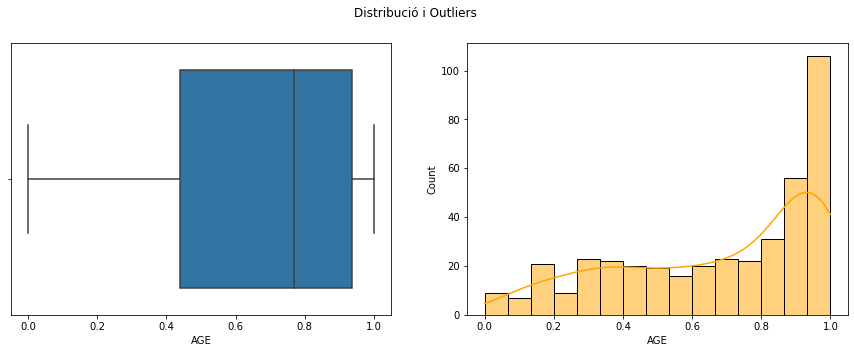

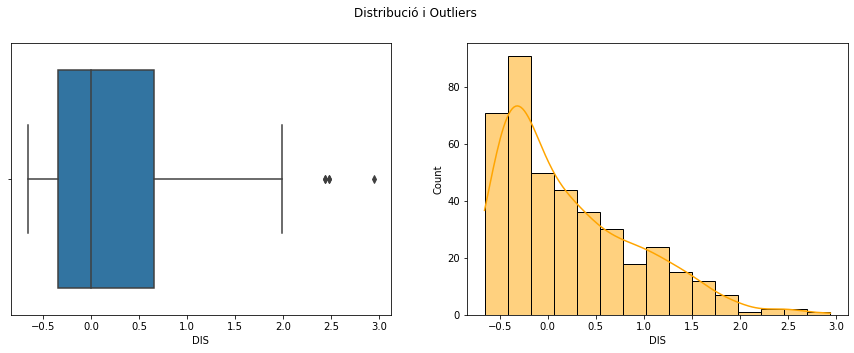

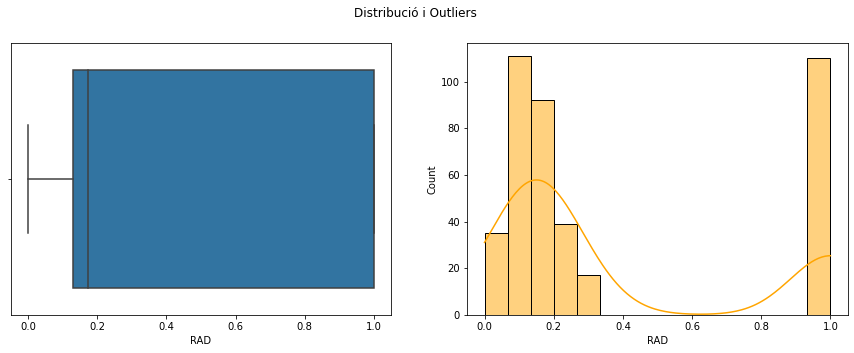

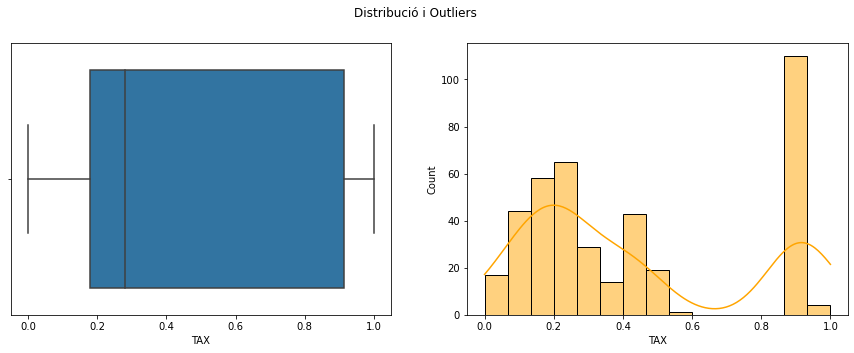

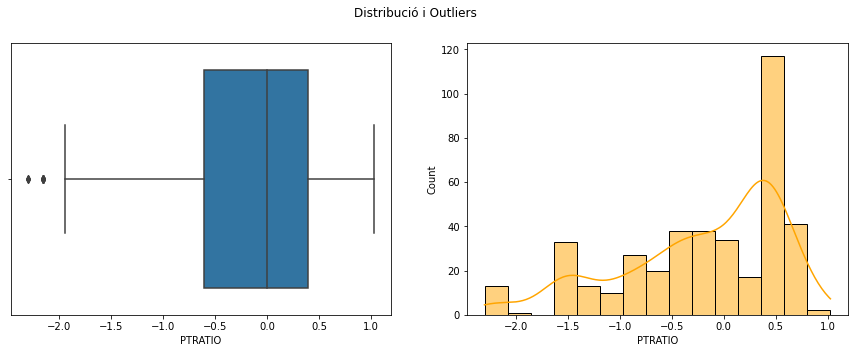

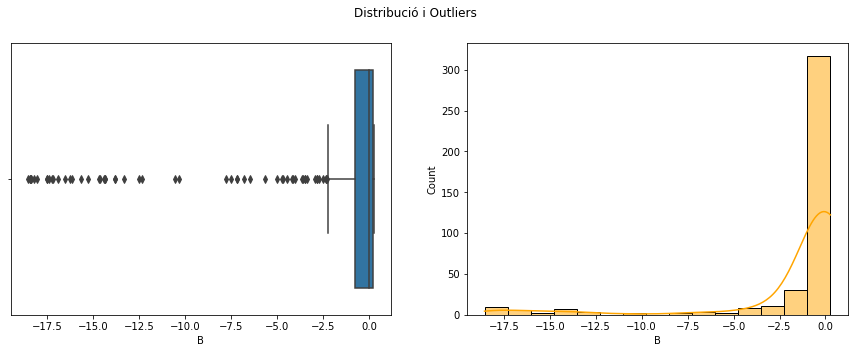

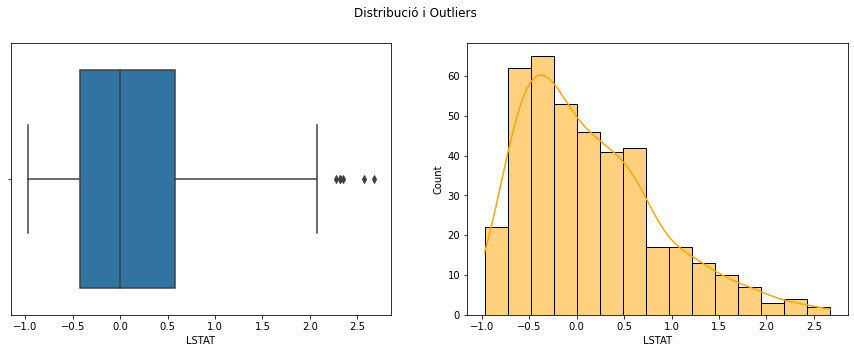

In [25]:

def plotsPreProcessing(X_train):
    for column in X_train:
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('Distribució i Outliers')
        sns.histplot(ax=axes[1], data=X_train, x=X_train[column], bins=15, color='orange', kde= True)
        sns.boxplot(ax=axes[0], x =X_train[column])
    
    
plotsPreProcessing(X_train)

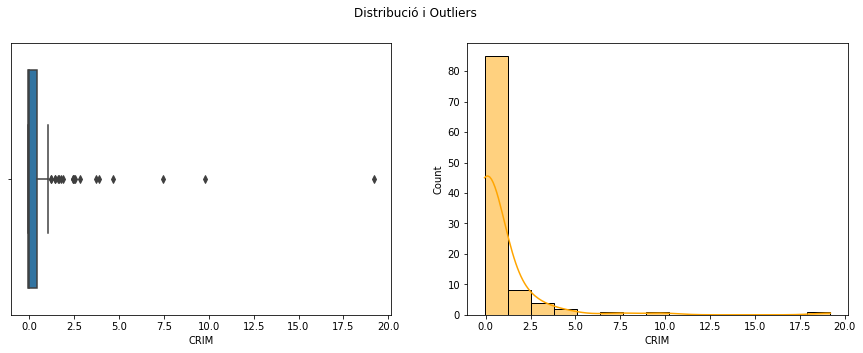

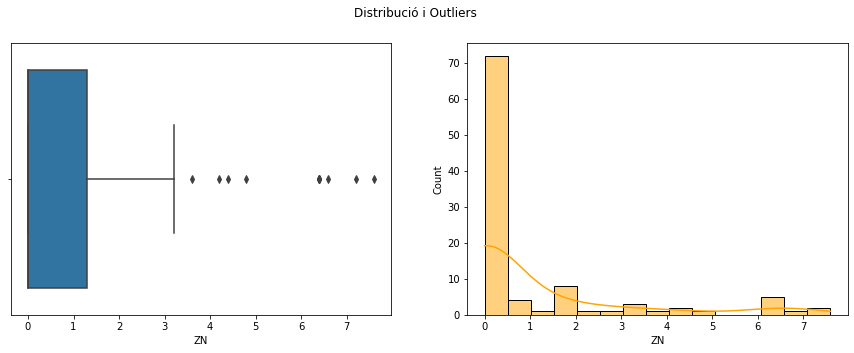

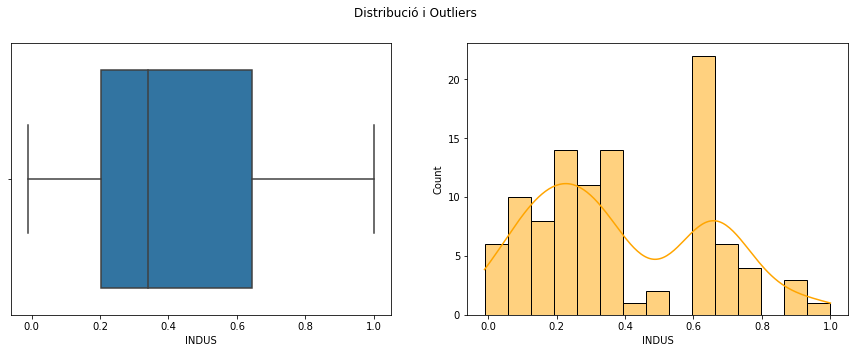

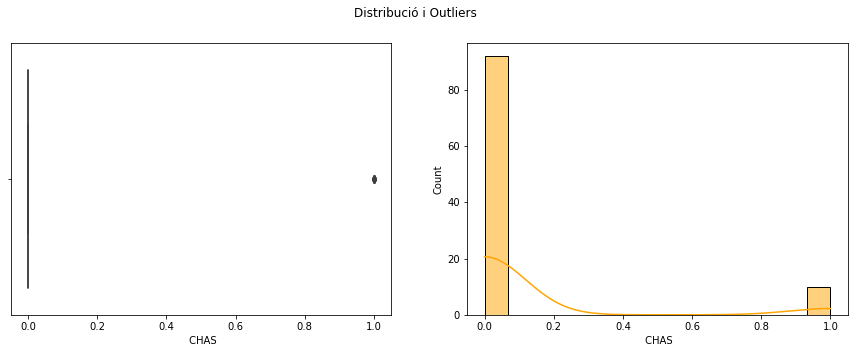

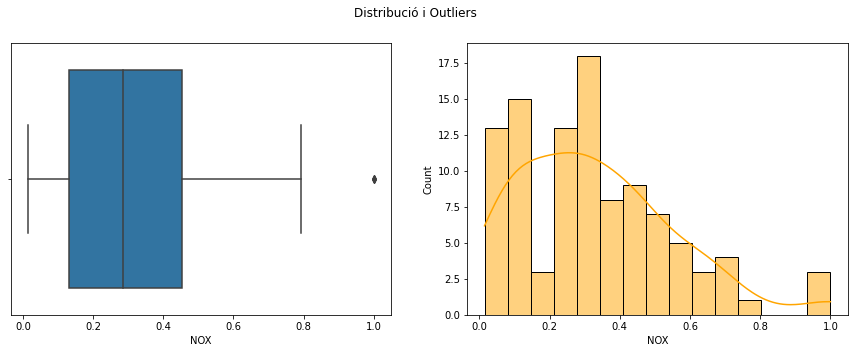

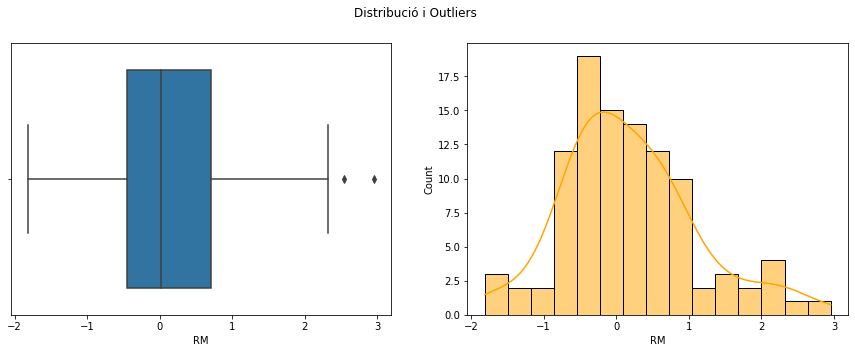

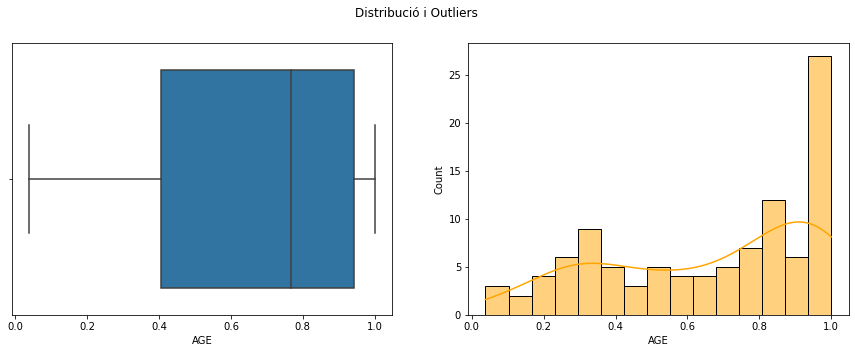

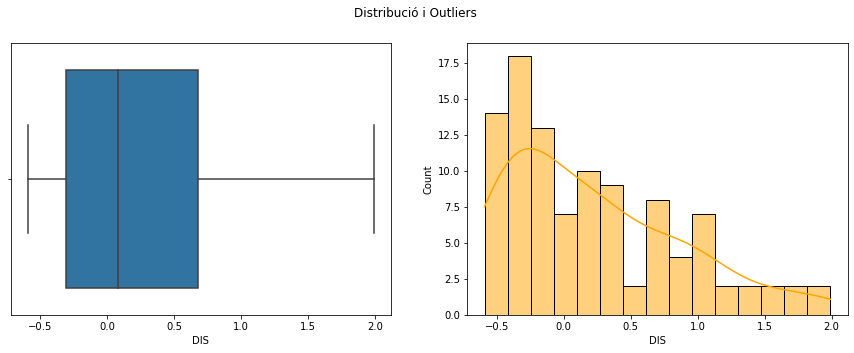

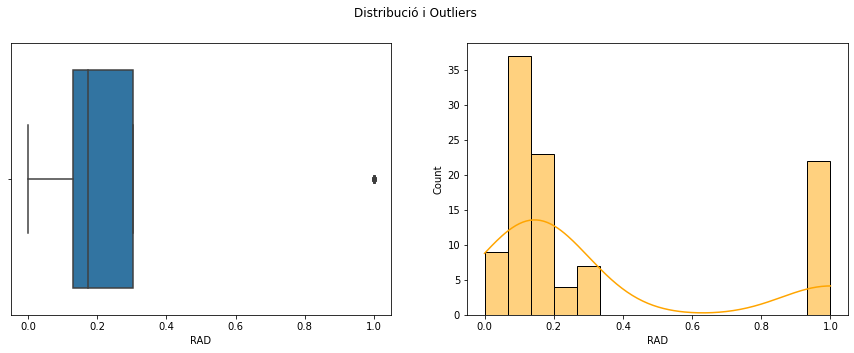

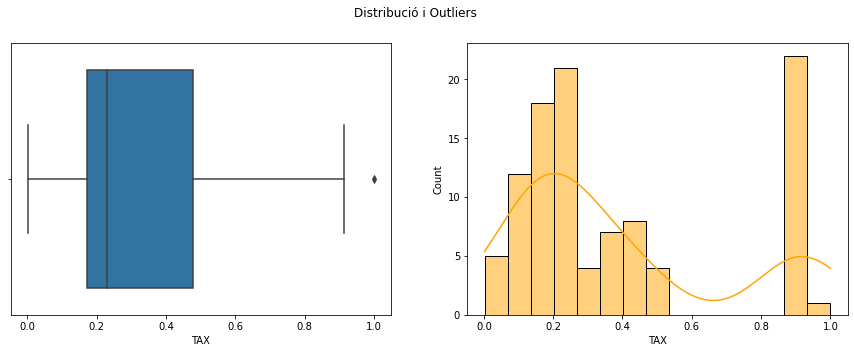

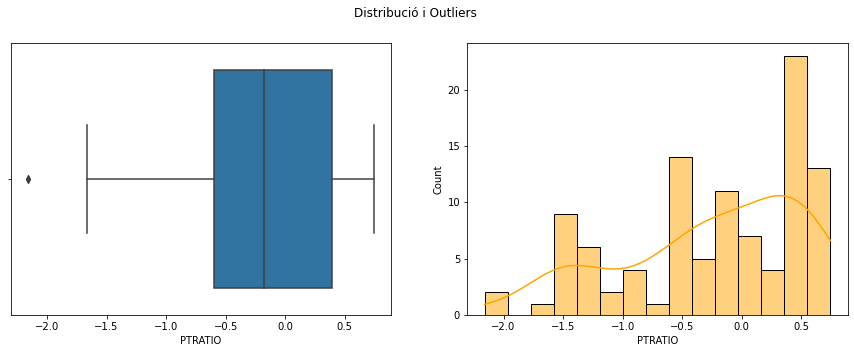

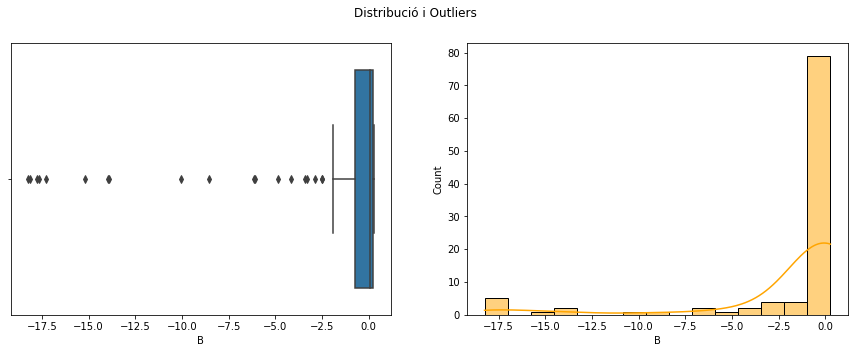

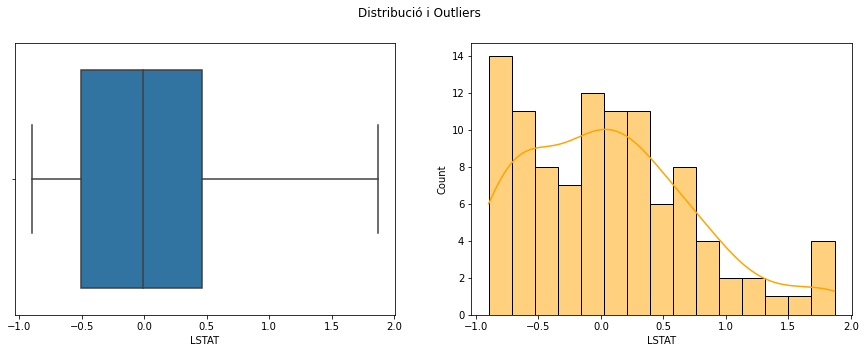

In [26]:
def plotsPreProcessing(X_test):
    for column in X_test:
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('Distribució i Outliers')
        sns.histplot(ax=axes[1], data=X_test, x=X_test[column], bins=15, color='orange', kde= True)
        sns.boxplot(ax=axes[0], x =X_test[column])
    
    
plotsPreProcessing(X_test)